In [2]:

!pip install transformers datasets --quiet
from transformers import pipeline
from datasets import load_dataset

# sample dataset (Yelp polarity reviews)
dataset = load_dataset("yelp_polarity", split="test[:5]")  # Just 5 reviews to test

# View a sample review
for example in dataset:
    print("\nREVIEW:")
    print(example['text'])



REVIEW:
Contrary to other reviews, I have zero complaints about the service or the prices. I have been getting tire service here for the past 5 years now, and compared to my experience with places like Pep Boys, these guys are experienced and know what they're doing. \nAlso, this is one place that I do not feel like I am being taken advantage of, just because of my gender. Other auto mechanics have been notorious for capitalizing on my ignorance of cars, and have sucked my bank account dry. But here, my service and road coverage has all been well explained - and let up to me to decide. \nAnd they just renovated the waiting room. It looks a lot better than it did in previous years.

REVIEW:
Last summer I had an appointment to get new tires and had to wait a super long time. I also went in this week for them to fix a minor problem with a tire they put on. They \""fixed\"" it for free, and the very next morning I had the same issue. I called to complain, and the \""manager\"" didn't even

In [4]:
classifier = pipeline("sentiment-analysis")
print("\nPREDICTIONS:")
for example in dataset:
    result = classifier(example['text'])[0]
    print(f"Sentiment: {result['label']} | Confidence: {round(result['score'], 3)}")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.



PREDICTIONS:
Sentiment: NEGATIVE | Confidence: 0.993
Sentiment: NEGATIVE | Confidence: 0.998
Sentiment: NEGATIVE | Confidence: 0.992
Sentiment: NEGATIVE | Confidence: 0.999
Sentiment: POSITIVE | Confidence: 0.999


In [5]:
# more test data ( 100 samples )
dataset = load_dataset("yelp_polarity", split="test[:100]")

# pandas DataFrame for easier analysis
import pandas as pd

texts = [example['text'] for example in dataset]
true_labels = [example['label'] for example in dataset]  # 1 = POSITIVE, 0 = NEGATIVE

df = pd.DataFrame({'text': texts, 'true_label': true_labels})
df['true_label'] = df['true_label'].map({1: 'POSITIVE', 0: 'NEGATIVE'})


In [7]:

from transformers import pipeline
classifier = pipeline("sentiment-analysis", truncation=True)

predictions = []
for text in df['text']:
    pred = classifier(text)[0]
    predictions.append(pred['label'])

df['predicted_label'] = predictions
df.head()


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,text,true_label,predicted_label
0,"Contrary to other reviews, I have zero complai...",POSITIVE,NEGATIVE
1,Last summer I had an appointment to get new ti...,NEGATIVE,NEGATIVE
2,"Friendly staff, same starbucks fair you get an...",POSITIVE,NEGATIVE
3,The food is good. Unfortunately the service is...,NEGATIVE,NEGATIVE
4,Even when we didn't have a car Filene's Baseme...,POSITIVE,POSITIVE


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Accuracy: 85.0%

Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.81      0.90      0.85        48
    POSITIVE       0.89      0.81      0.85        52

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



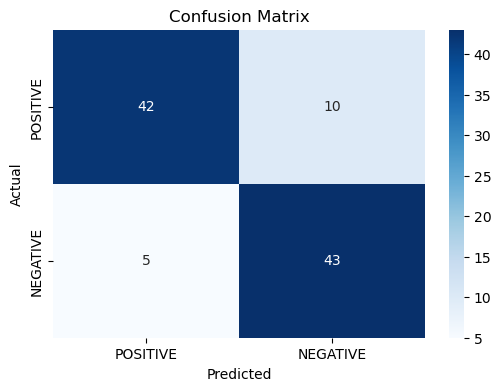

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(df['true_label'], df['predicted_label'])
print(f"Accuracy: {round(accuracy * 100, 2)}%")

# Classification report
print("\nClassification Report:\n")
print(classification_report(df['true_label'], df['predicted_label']))

# Confusion Matrix
cm = confusion_matrix(df['true_label'], df['predicted_label'], labels=["POSITIVE", "NEGATIVE"])

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["POSITIVE", "NEGATIVE"], yticklabels=["POSITIVE", "NEGATIVE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
